<center><font color="orange" size="6"><b>Sparks Foundation</b></font></center><br>
<font size="5"><b>Data Science and Business Analytics internship</b></font><br><br>
<font size="4"><b>Name : Manikanta Bandla</b></font><br><br>

<font size="4"><b><font color="blue">Task #6:</font> Prediction using Decision tree Algorithm</b></font><br><br>
<font size="4"><b><font color="blue">Problem Statement :</font>Create the Decision Tree classifier and visualize it graphically.</b></font>

In [490]:
# Importing necessary libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [491]:
# Reading csv file of iris dataset
df = pd.read_csv("C:/Users/MANIKANTA\Desktop/GRIP/Iris _Decision_Tree.csv")

In [492]:
# Getting the first five roews
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [493]:
# Shape of dataset (rows, columns)
df.shape

(150, 6)

In [494]:
# Deleting the column "Id", not necessary
del df["Id"]

In [495]:
# Checking for null values in dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [496]:
# Datatypes of columns in iris dataset
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [497]:
# Describing each column of dataset with parameters such as count, min, max, 1st quartile, 2nd quartile, 3rd quartile etc.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [498]:
# Checking whether dataset is balanced or not i.e whether output labels uniformly distributed or not
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [499]:
# Unique output labels i.e different flowers
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

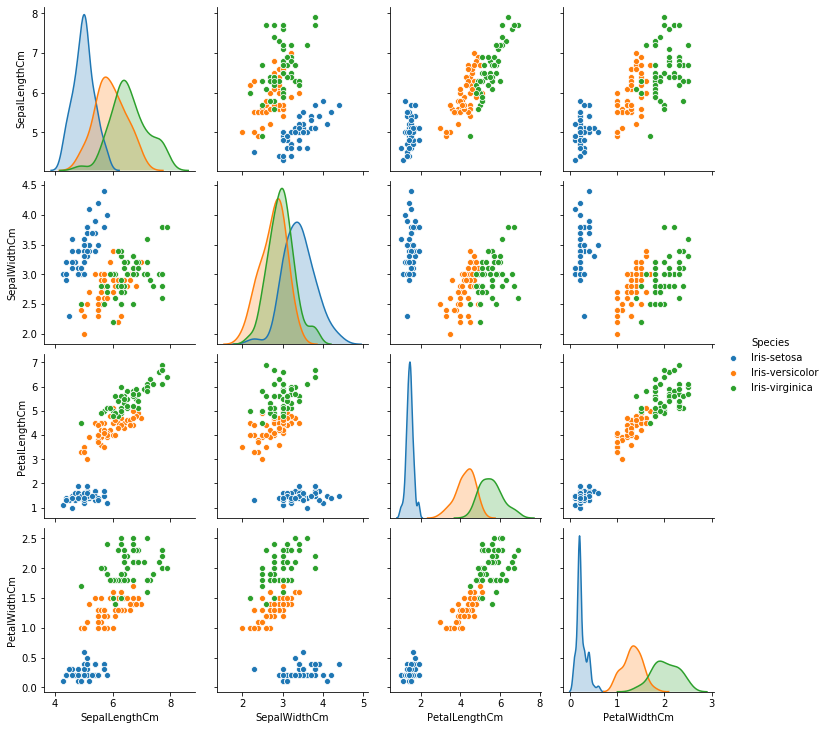

In [500]:
# Visualizing the dataset using pairplot
sns.pairplot(df, hue="Species")

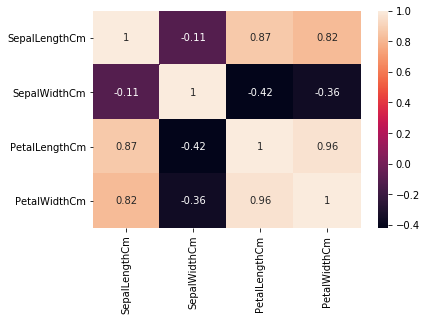

In [501]:
# Correlation matrix
sns.heatmap(df.drop(["Species"],axis="columns").corr(),annot=True)

<b>SepalLengthCm, PetalLengthCm are positively correlated</b><br>
<b>SepalLengthCm, PetalWidthCm are positively correlated</b><br>
<b>PetalLengthCm, PetalLengthCm are positively correlated</b><br>

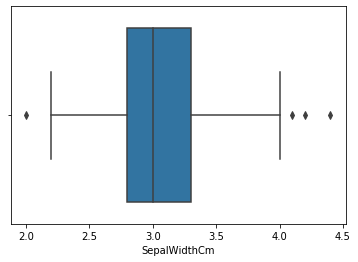

In [502]:
# Box plotting the df["SepalWidthCm"]
sns.boxplot(df["SepalWidthCm"])

<b>We can observe there are some outliers</b><br>

In [503]:
# IQR(Inter Quartile Range) can be used for non-Gaussian distribution to get outliers

q25, q75 = np.percentile(df["SepalWidthCm"],25), np.percentile(df["SepalWidthCm"],75)
print("25% Quartile = ",q25,"\n75% Quartile = ",q75)
k = 1.5
iqr = q75 - q25
lower, upper = q25 - k*iqr, q75 + k*iqr 
x = df["SepalWidthCm"]<lower
y = df["SepalWidthCm"]>upper
print("Lower_bound = ",lower,"\nUpper_bound = ",upper)
outlier_iqr_SepalLength = x|y
outlier = df[outlier_iqr_SepalLength == True]
outlier["SepalWidthCm"] = None
non_outlier = df[outlier_iqr_SepalLength == False]
df1 = non_outlier.append(outlier)
df1['SepalWidthCm'] = df1['SepalWidthCm'].fillna(df1['SepalWidthCm'].mean())

outlier

25% Quartile =  2.8 
75% Quartile =  3.3
Lower_bound =  2.05 
Upper_bound =  4.05


C:\Users\MANIKANTA\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,None,1.5,0.4,Iris-setosa
32,5.2,None,1.5,0.1,Iris-setosa
33,5.5,None,1.4,0.2,Iris-setosa
60,5.0,None,3.5,1.0,Iris-versicolor


In [504]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.500000,1.4,0.2,Iris-setosa
1,4.9,3.000000,1.4,0.2,Iris-setosa
2,4.7,3.200000,1.3,0.2,Iris-setosa
3,4.6,3.100000,1.5,0.2,Iris-setosa
4,5.0,3.600000,1.4,0.2,Iris-setosa
...,...,...,...,...,...
149,5.9,3.000000,5.1,1.8,Iris-virginica
15,5.7,3.036986,1.5,0.4,Iris-setosa
32,5.2,3.036986,1.5,0.1,Iris-setosa
33,5.5,3.036986,1.4,0.2,Iris-setosa


In [505]:
# Converting the "Species" column into categorical data
df1["Species"] = df1["Species"].apply(lambda x: flower_to_num[x])
df1["Species"].unique()

array([0, 1, 2], dtype=int64)

In [506]:


# Mapping numbers to flowers and flowers to numbers
num_to_flower = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica' }
flower_to_num = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 }

In [507]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [508]:
# Decompose dataset into input features "x" and output features "y"
x = df1.drop(["Species"],axis=1)
y = df1["Species"]

In [509]:
# Standardization scaling
# Scales the data into 0 mean and 1 std
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x = scaler.fit_transform(x)

In [510]:
x.shape

(150, 4)

In [511]:
y.shape

(150,)

In [512]:
# Splitting the data and train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [513]:
print(x_train.shape)
y_train.shape

(120, 4)


(120,)

In [514]:
print(x_test.shape)
y_test.shape

(30, 4)


(30,)

In [515]:
# Building a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [516]:
# Score of model on test set
model.score(x_test,y_test)

0.9666666666666667

In [517]:
# Training examples whose labels that are falsely predicted
test_data = pd.DataFrame(model.predict(x_test),columns=["Predicted"])
test_data["Predicted"] = test_data["Predicted"].apply(lambda x: classes_dict[x])
test_data["True"] = y_test.values
test_data["True"] = test_data["True"].apply(lambda x: classes_dict[x])
test_data[(test_data["Predicted"]==test_data["True"])==False]

,Predicted,True
10,Iris-versicolor,Iris-virginica


In [518]:
# Getting precision, recall of model
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.75      0.86         4

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30



In [519]:
# Printing confusion_matrix
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  1,  3]], dtype=int64)

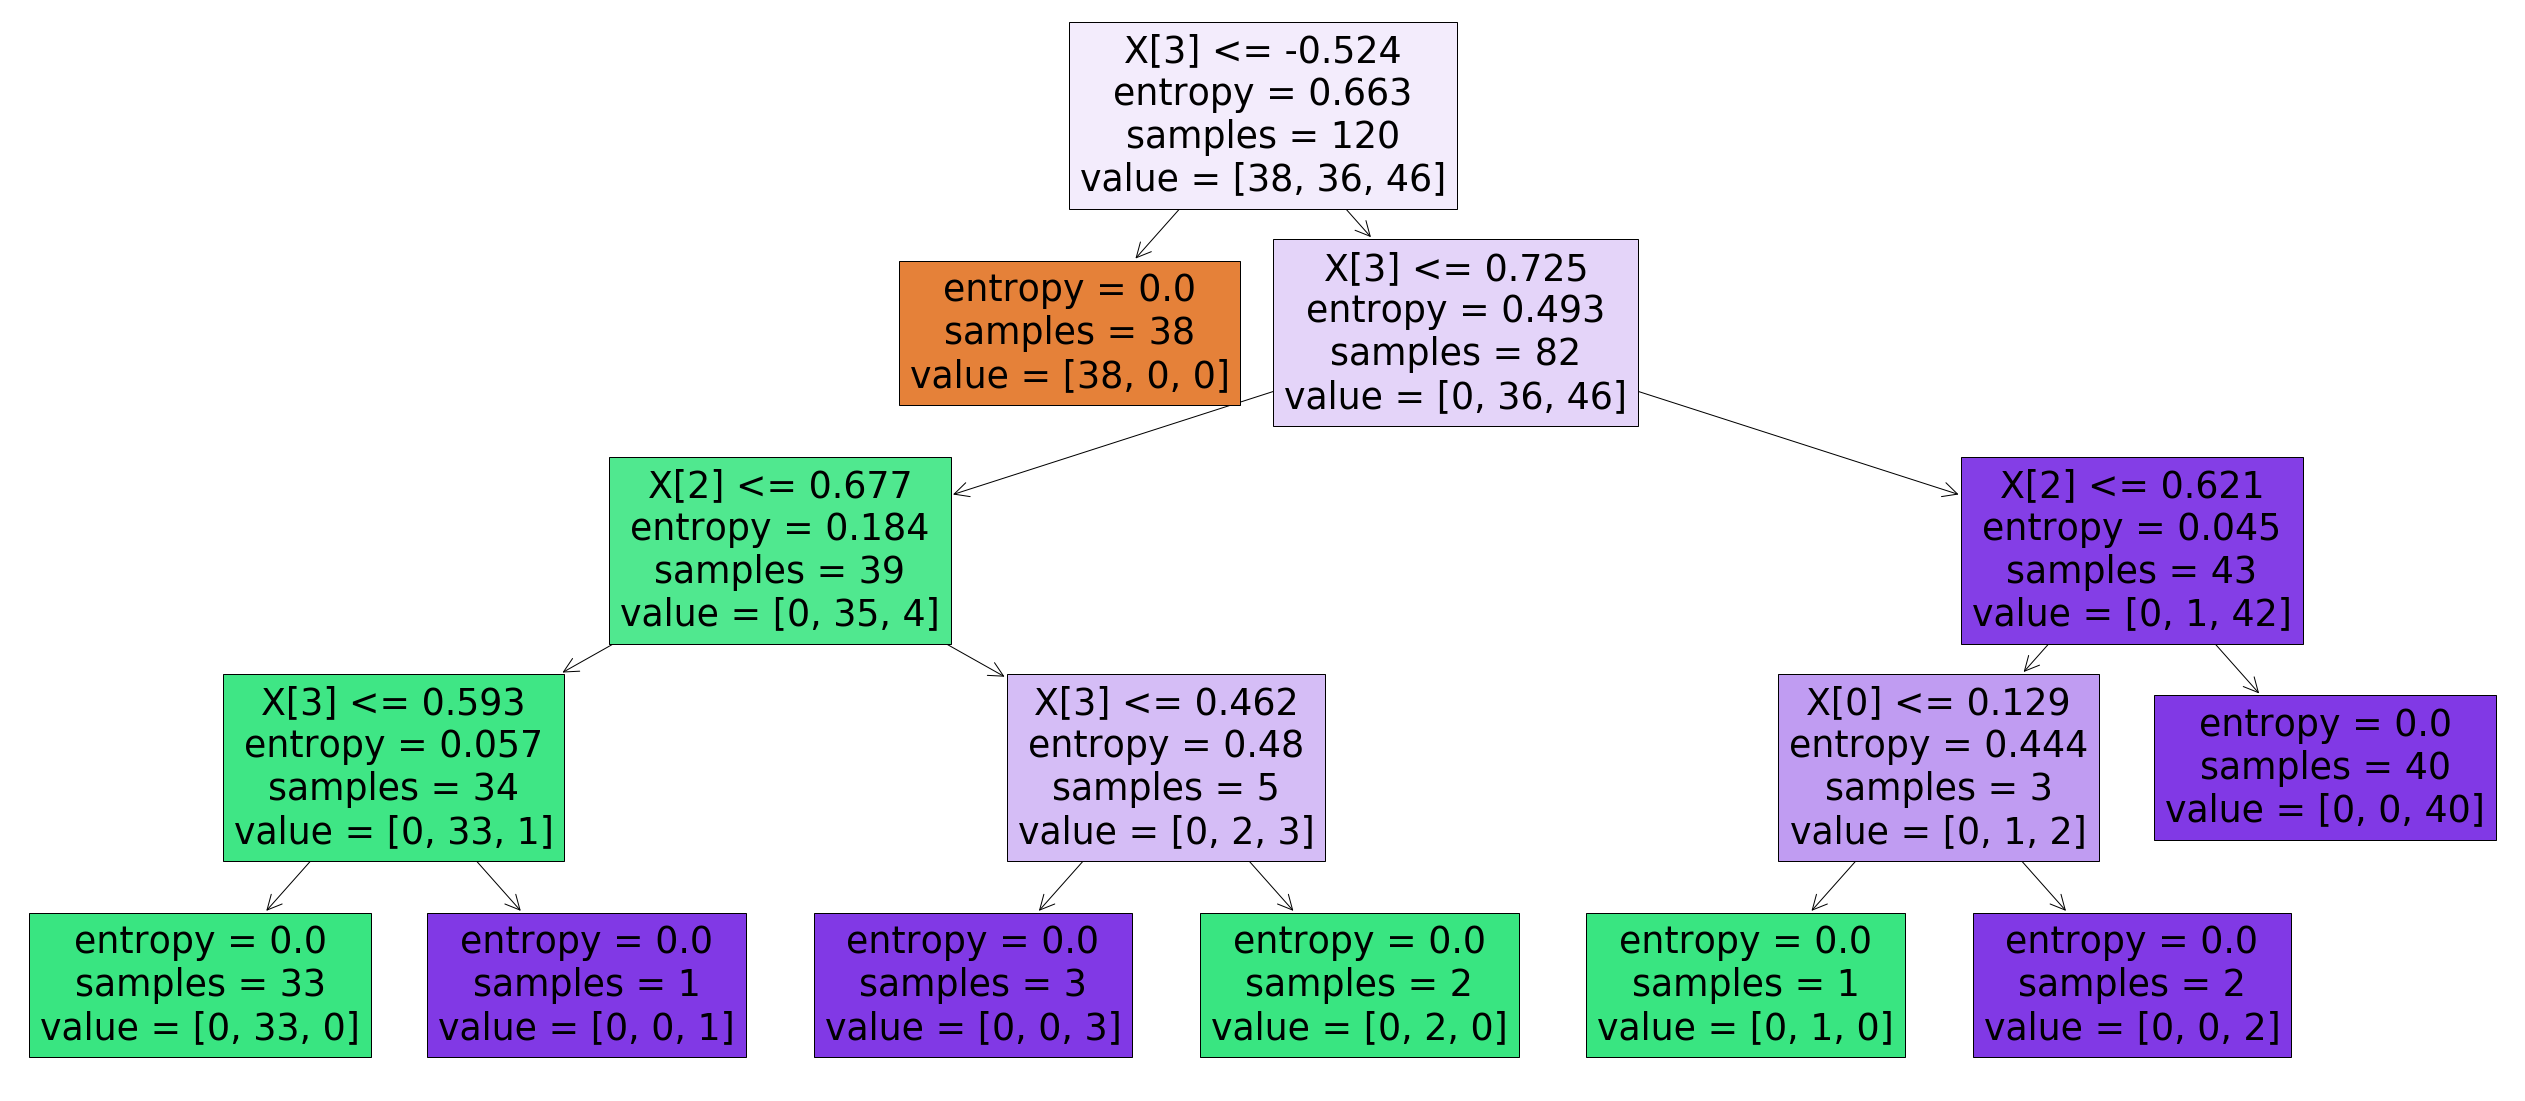

In [520]:
# Visualizing the tree model
from sklearn import tree
fig = plt.figure(figsize=(45,20))
_ = tree.plot_tree(model, filled=True)